## Tarea Curso preparación para Maestría en Sistemas de Información - EPN
### Cristian Benalcázar
#### 4-10-2020

## Análisis de Defunciones Generales 2020

### Descripción
Constituye todas las defunciones inscritas ocurridas en el país durante el año 2020, por todas las causas de muertes registradas, la información proviene del "Informe Estadístico de Defunción" y de los registros que provienen del sistema REVIT - DEFUNCIONES.

**Fuente:** Dirección General de Registro Civil, Identificación y Cedulación
**Unidad Generadora:**	Dirección de Soporte e Interoperabilidad de Registro 

[![Registro Civil](https://www.registrocivil.gob.ec/wp-content/uploads/2020/04/WhatsApp%20Image%202020-04-20%20at%2022.28.57%281%29.jpeg)](https://www.registrocivil.gob.ec/cifras)

**NOTA:** Se añade información de enero a septiembre de 2018 y 2019 a fin de generar una comparativa.



In [201]:
import pandas as pd

# Carga
path="https://raw.githubusercontent.com/Crisben/temp/master/Curso_python_EPN/Defunciones_Generales_2020_act_27_sept.csv"
defunciones = pd.read_csv(path,sep=';')
defunciones.head()


,PROVINCIA DEFUNCION,CANTON DEFUNCION,PARROQUIA DEFUNCION,1/1/2020,1/2/2020,1/3/2020,1/4/2020,1/5/2020,1/6/2020,1/7/2020,1/8/2020,1/9/2020
0,GALAPAGOS,ISABELA,PUERTO VILLAMIL,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN
1,GALAPAGOS,ISABELA,TOMAS DE BERLANGA,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,GALAPAGOS,SAN CRISTOBAL,PUERTO BAQUERIZO MORENO,4.0,3.0,NaN,NaN,NaN,2.0,2.0,3.0,3.0
3,GALAPAGOS,SANTA CRUZ,BELLA VISTA,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
4,GALAPAGOS,SANTA CRUZ,PUERTO AYORA,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,1.0


#### Defunciones por provincia 
Observamos que existe una mayor cantidad de defunciones en las provincias de **Guayas**, **Pichincha** y **Manabí**.


Text(0.5, 1.0, 'Defunciones 2020 por provincia')

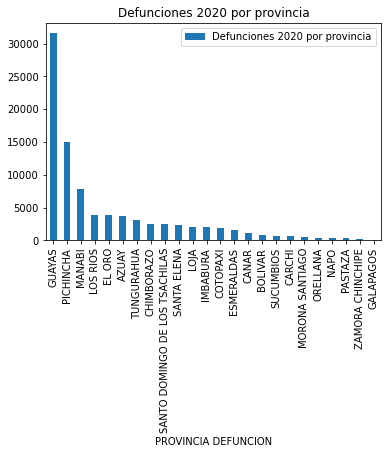

In [183]:
# Limpieza campo provincia Santo Domingo
defunciones["PROVINCIA DEFUNCION"]=defunciones["PROVINCIA DEFUNCION"].replace("DE LOS TSACHILAS", "")
defunciones["total_2020"]=defunciones.iloc[:,3:12].sum(axis=1)
import matplotlib.pyplot as plt
defunciones.groupby(["PROVINCIA DEFUNCION"])['total_2020'].sum().sort_values(ascending=False).plot(kind='bar').legend(["Defunciones 2020 por provincia"])
plt.title("Defunciones 2020 por provincia")

#### Evolución de defunciones 2020
Cabe señalar que los datos utilizados no presentan el motivo de fallecimiento, por cuanto no podemos identificar dicho detalle; sin embargo, al observar el comportamiento mensual podemos notar un crecimiento importante a partir del mes de marzo, el cual si analizamos muy brevemente podríamos atribuir a los efectos de la pandemia por Covid-19.

Text(0.5, 1.0, 'Evolución mensual de defunciones 2020')

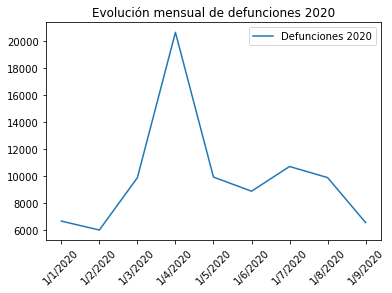

In [184]:
defunciones.iloc[:,3:12].sum().plot(kind='line').legend(["Defunciones 2020"])
plt.xticks(rotation=45)
plt.title("Evolución mensual de defunciones 2020")

#### Evolución de defunciones 2018-2020
Es importante contrastar el comportamiento antes observado con el registrado en años anteriores.

In [217]:
# Carga histórico
path="https://raw.githubusercontent.com/Crisben/temp/master/Curso_python_EPN/Defunciones_Generales_2018_2020_r.csv"
defunciones_historico = pd.read_csv(path, sep=';')


In [213]:
En donde observamos con mayor claridad el efecto de la pandemia por Covid-19 en las defunciones registradas durante 2020.


6571

Text(0.5, 1.0, 'Evolución mensual de defunciones 2018-2020 (ene-sept)')

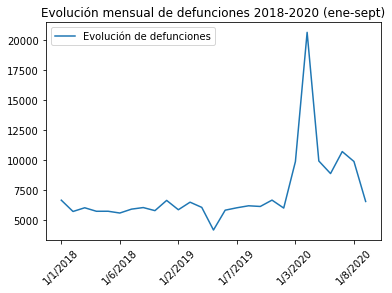

In [216]:
defunciones_historico.iloc[:,1:28].sum().plot(kind='line').legend(["Evolución de defunciones"])
plt.xticks(rotation=45)
plt.title("Evolución mensual de defunciones 2018-2020 (ene-sept)")

Con el efecto antes observado la media de defunciones mensuales de 2020 presenta un crecimiento del 60% y 62% en relación a 2018 y 2019 respectivamente.


In [283]:
prom_18 = defunciones_historico.iloc[:,1:8].sum().mean()
prom_19 = defunciones_historico.iloc[:,9:17].sum().mean()
prom_20 = defunciones_historico.iloc[:,18:28].sum().mean()
crec_20 = (prom_20-prom_19)/prom_19*100
pd.DataFrame({"Año": [2018, 2019, 2020], "Promedio mensual de defunciones": [prom_18, prom_19, prom_20]})

,Año,Promedio mensual de defunciones
0,2018,5931.142857
1,2019,5878.463750
2,2020,9544.800000
